In [ ]:
pip install pandas matplotlib seaborn tabula-py pdfplumber

In [2]:
# Import các thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [138]:
# Chuyển đổi dữ liệu PDF sang CSV
import pdfplumber

pdf_file = "../data/data.pdf"
data = []

# Trích xuất dữ liệu từ PDF
with pdfplumber.open(pdf_file) as pdf:
    for page in pdf.pages:
        table = page.extract_table()
        if table:
            data.extend(table)

# Chuyển dữ liệu thành DataFrame
columns = ["STT", "MSSV", "Họ và tên lót", "Tên", "Khoa", "Ngành", 
           "ĐRL HK1", "ĐRL HK2", "ĐTB RL NH", "Xếp loại RL", 
           "TBHT HK1", "TBHT HK2", "TBHT NH", "Xếp loại HT", 
           "Đề nghị Danh hiệu"]
df = pd.DataFrame(data[1:], columns=columns)  # Bỏ hàng tiêu đề trùng lặp
# Chuẩn hóa tên cột (nếu cần)
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
df.head()


,stt,mssv,họ_và_tên_lót,tên,khoa,ngành,đrl_hk1,đrl_hk2,đtb_rl_nh,xếp_loại_rl,tbht_hk1,tbht_hk2,tbht_nh,xếp_loại_ht,đề_nghị_danh_hiệu
0,1,23DH114197,Đỗ Nguyễn Phương,Anh,CNTT,CNTT,78,87,"82,5",Tốt,"3,81","3,91","3,85",Xuất sắc,Học bổng SV tài năng
1,2,23DH110821,Phan Minh,Đức,CNTT,CNTT,88,89,"88,5",Tốt,"3,67",4,"3,82",Xuất sắc,Học bổng SV nỗ lực
2,3,23DH112302,Phạm Thị Hồng,Ngọc,CNTT,CNTT,78,87,"82,5",Tốt,"3,64","3,88","3,75",Xuất sắc,Học bổng SV nỗ lực
3,4,23DH111742,Nguyễn Trần Nguyên,Khôi,CNTT,CNTT,83,95,89,Tốt,"3,56","3,91","3,72",Xuất sắc,Học bổng SV nỗ lực
4,5,23DH111140,Phan Thanh,Hòa,CNTT,CNTT,78,87,"82,5",Tốt,"3,81","3,63","3,72",Xuất sắc,Học bổng SV nỗ lực


In [139]:
# Loại bỏ các hàng bị lỗi hoặc không chứa thông tin
#df = df.dropna()
df.head()

,stt,mssv,họ_và_tên_lót,tên,khoa,ngành,đrl_hk1,đrl_hk2,đtb_rl_nh,xếp_loại_rl,tbht_hk1,tbht_hk2,tbht_nh,xếp_loại_ht,đề_nghị_danh_hiệu
0,1,23DH114197,Đỗ Nguyễn Phương,Anh,CNTT,CNTT,78,87,"82,5",Tốt,"3,81","3,91","3,85",Xuất sắc,Học bổng SV tài năng
1,2,23DH110821,Phan Minh,Đức,CNTT,CNTT,88,89,"88,5",Tốt,"3,67",4,"3,82",Xuất sắc,Học bổng SV nỗ lực
2,3,23DH112302,Phạm Thị Hồng,Ngọc,CNTT,CNTT,78,87,"82,5",Tốt,"3,64","3,88","3,75",Xuất sắc,Học bổng SV nỗ lực
3,4,23DH111742,Nguyễn Trần Nguyên,Khôi,CNTT,CNTT,83,95,89,Tốt,"3,56","3,91","3,72",Xuất sắc,Học bổng SV nỗ lực
4,5,23DH111140,Phan Thanh,Hòa,CNTT,CNTT,78,87,"82,5",Tốt,"3,81","3,63","3,72",Xuất sắc,Học bổng SV nỗ lực


In [140]:
df["tbht_hk1"] = df["tbht_hk1"].str.replace(',', '.').astype(float)
df["tbht_hk2"] = df["tbht_hk2"].str.replace(',', '.').astype(float) 
df["tbht_nh"] = df["tbht_nh"].str.replace(',', '.').astype(float)
df["đtb_rl_nh"] = df["đtb_rl_nh"].str.replace(',', '.').astype(float)

In [148]:
# Đổi các cột liên quan sang kiểu số

numeric_columns = ["đrl_hk1", "đrl_hk2", "đtb_rl_nh", "tbht_hk1", "tbht_hk2", "tbht_nh"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.head()

,stt,mssv,họ_và_tên_lót,tên,khoa,ngành,đrl_hk1,đrl_hk2,đtb_rl_nh,xếp_loại_rl,tbht_hk1,tbht_hk2,tbht_nh,xếp_loại_ht,đề_nghị_danh_hiệu
0,1,23DH114197,Đỗ Nguyễn Phương,Anh,CNTT,CNTT,78,87,82.5,Tốt,3.81,3.91,3.85,Xuất sắc,Học bổng SV tài năng
1,2,23DH110821,Phan Minh,Đức,CNTT,CNTT,88,89,88.5,Tốt,3.67,4.00,3.82,Xuất sắc,Học bổng SV nỗ lực
2,3,23DH112302,Phạm Thị Hồng,Ngọc,CNTT,CNTT,78,87,82.5,Tốt,3.64,3.88,3.75,Xuất sắc,Học bổng SV nỗ lực
3,4,23DH111742,Nguyễn Trần Nguyên,Khôi,CNTT,CNTT,83,95,89.0,Tốt,3.56,3.91,3.72,Xuất sắc,Học bổng SV nỗ lực
4,5,23DH111140,Phan Thanh,Hòa,CNTT,CNTT,78,87,82.5,Tốt,3.81,3.63,3.72,Xuất sắc,Học bổng SV nỗ lực


In [ ]:
# Thống kê số lượng sinh viên theo danh hiệu
summary = df['đề_nghị_danh_hiệu'].value_counts()
print(summary)

# Điểm TB học tập và rèn luyện trung bình
mean_scores = df[numeric_columns].mean()
print(mean_scores)

C:\Users\ihatesea\AppData\Local\Temp\ipykernel_11576\1247637093.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='đề_nghị_danh_hiệu', palette='viridis')


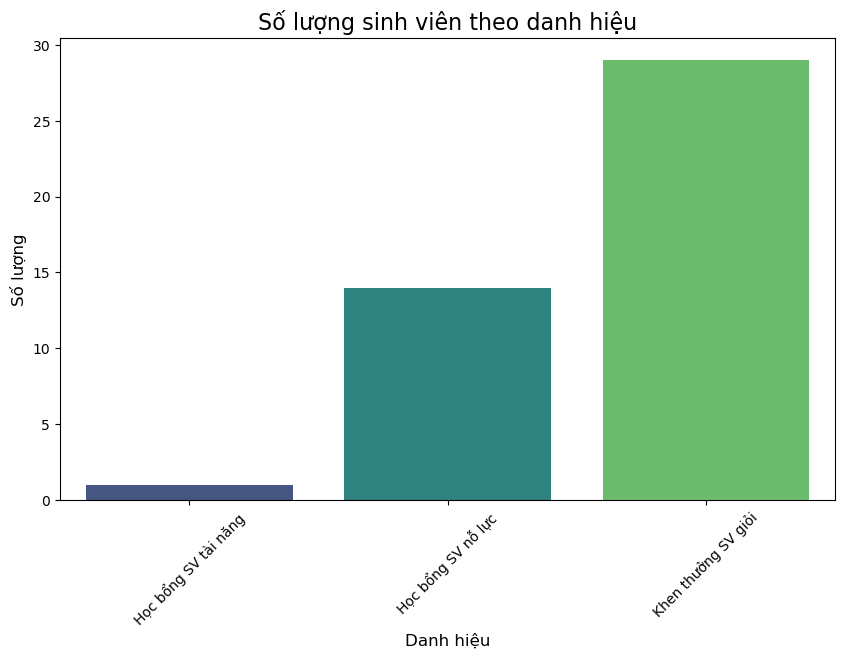

In [152]:
# Biểu đồ cột số lượng sinh viên theo danh hiệu
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='đề_nghị_danh_hiệu', palette='viridis')
plt.title("Số lượng sinh viên theo danh hiệu", fontsize=16)
plt.xlabel("Danh hiệu", fontsize=12)
plt.ylabel("Số lượng", fontsize=12)
plt.xticks(rotation=45)
plt.show()


C:\Users\ihatesea\AppData\Local\Temp\ipykernel_11576\3005155629.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='đề_nghị_danh_hiệu', y='tbht_nh', palette='coolwarm')


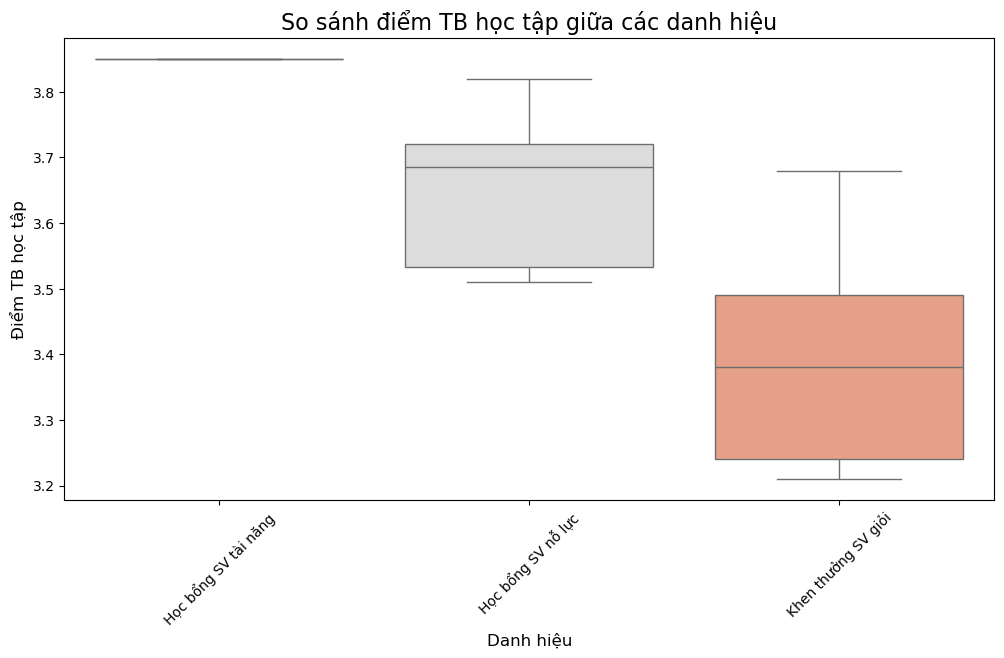

In [153]:
# Biểu đồ hộp (boxplot) so sánh điểm TB học tập giữa các danh hiệu
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='đề_nghị_danh_hiệu', y='tbht_nh', palette='coolwarm')
plt.title("So sánh điểm TB học tập giữa các danh hiệu", fontsize=16)
plt.xlabel("Danh hiệu", fontsize=12)
plt.ylabel("Điểm TB học tập", fontsize=12)
plt.xticks(rotation=45)
plt.show()


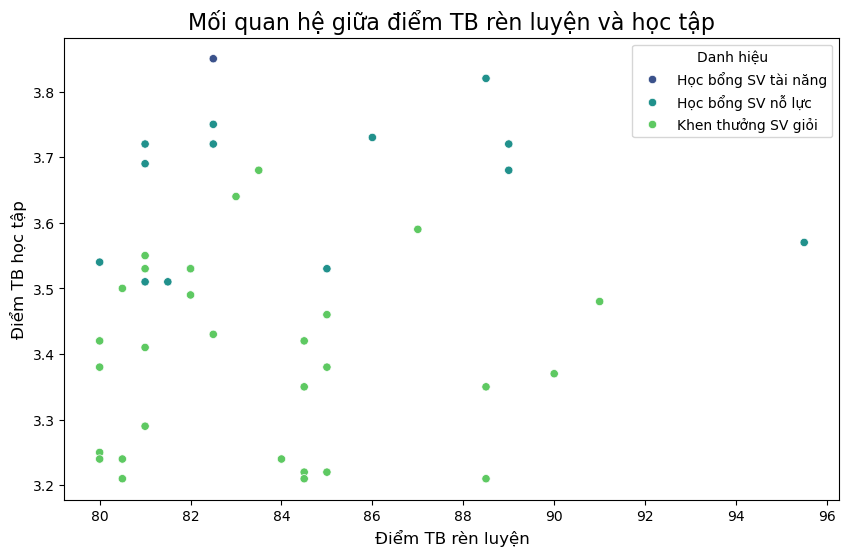

In [154]:
# Biểu đồ phân tán giữa điểm TB học tập và rèn luyện
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='đtb_rl_nh', y='tbht_nh', hue='đề_nghị_danh_hiệu', palette='viridis')
plt.title("Mối quan hệ giữa điểm TB rèn luyện và học tập", fontsize=16)
plt.xlabel("Điểm TB rèn luyện", fontsize=12)
plt.ylabel("Điểm TB học tập", fontsize=12)
plt.legend(title="Danh hiệu")
plt.show()


In [155]:
# Lưu DataFrame sạch vào file CSV
df.to_csv("cleaned_student_rewards.csv", index=False)

# Xuất báo cáo Markdown (nếu cần)
summary.to_markdown("summary_report.md")


In [156]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Chuẩn bị dữ liệu
X = df[numeric_columns]
y = df['đề_nghị_danh_hiệu']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Huấn luyện mô hình
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


                     precision    recall  f1-score   support

 Học bổng SV nỗ lực       0.71      1.00      0.83         5
Khen thưởng SV giỏi       1.00      0.78      0.88         9

           accuracy                           0.86        14
          macro avg       0.86      0.89      0.85        14
       weighted avg       0.90      0.86      0.86        14

